## Importing Data and EDA

In [108]:
# Loading libraries
import pandas as pd
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

### Public Land Data Import and Review

In [41]:
gdb_path = "Data/PADUS4_1Geodatabase/PADUS4_1Geodatabase.gdb"
fiona.listlayers(gdb_path)

['Public_Access',
 'Category',
 'Designation_Type',
 'GAP_Status',
 'IUCN_Category',
 'Agency_Name',
 'Agency_Type',
 'State_Name',
 'PADUS4_1Combined_Proclamation_Marine_Fee_Designation_Easement',
 'PADUS4_1Fee',
 'PADUS4_1Proclamation',
 'PADUS4_1Marine',
 'PADUS4_1Easement',
 'PADUS4_1Designation']

In [43]:
padus = gpgdb_path = "Data/PADUS4_1Geodatabase/PADUS4_1Geodatabase.gdb"  
layer_name = "PADUS4_1Fee"
padus_fee = gpd.read_file(gdb_path, layer=layer_name)
padus_fee.head()

C:\Users\rbrio\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts.  The processing may be really slow.  You can skip the processing by setting METHOD=SKIP.
  return ogr_read(


,Category,Own_Type,Own_Name,Loc_Own,Mang_Type,Mang_Name,Loc_Mang,Des_Tp,Loc_Ds,Unit_Nm,...,GAPCdSrc,GAPCdDt,IUCN_Cat,IUCNCtSrc,IUCNCtDt,Date_Est,Comments,SHAPE_Length,SHAPE_Area,geometry
0,Fee,UNK,UNK,Unknown,FED,ARS,Agricultural Research Service (ARS),FOTH,Other Designation,Central Plains Experimental Range,...,GAP - TNC,2008,Other Conservation Area,GAP - Default,2024,1939,,80349.161410,5.938316e+07,"MULTIPOLYGON (((-728264.011 2009738.467, -7279..."
1,Fee,UNK,UNK,Unknown,FED,ARS,Agricultural Research Service (ARS),REA,Research and Educational Land,Agricultural Research Service (ARS),...,GAP,2010,Unassigned,GAP - Default,2024,,,73749.253437,2.117374e+08,"MULTIPOLYGON (((-768709.142 2642891.08, -76411..."
2,Fee,UNK,UNK,Unknown,FED,ARS,Agricultural Research Service (ARS),REA,Research and Educational Land,Jornada Experimental Range,...,GAP,2005,Other Conservation Area,GAP - Default,2024,,,117428.395858,4.421531e+08,"MULTIPOLYGON (((-1002547.493 1132581.207, -999..."
3,Fee,UNK,UNK,Unknown,FED,ARS,Agricultural Research Service (ARS),REA,Research and Educational Land,Roman L. Hruska U.s. Animal Meat Research Center,...,GAP,2008,Unassigned,GAP - Default,2024,1964,,63176.777626,1.397807e+08,"MULTIPOLYGON (((-176965.37 1953829.218, -17738..."
4,Fee,UNK,UNK,Unknown,FED,ARS,Agricultural Research Service (ARS),REA,Research and Educational Land,Santa Rita Experimental Range,...,GAP,2005,Other Conservation Area,GAP - Default,2024,1987,,83513.627280,2.171131e+08,"MULTIPOLYGON (((-1394172.042 1091515.412, -139..."


In [44]:
padus_fee['Own_Type'].unique()

array(['UNK', 'FED', 'NGO', 'STAT', 'TERR', 'TRIB', 'DIST', 'LOC', 'PVT',
       'JNT'], dtype=object)

In [113]:
# Count of features grouped by Own_Name
own_name_counts = (
    padus_fee.groupby("Own_Name")
             .size()
             .reset_index(name="count")
             .sort_values("count", ascending=True)  # ascending for horizontal bar chart
)

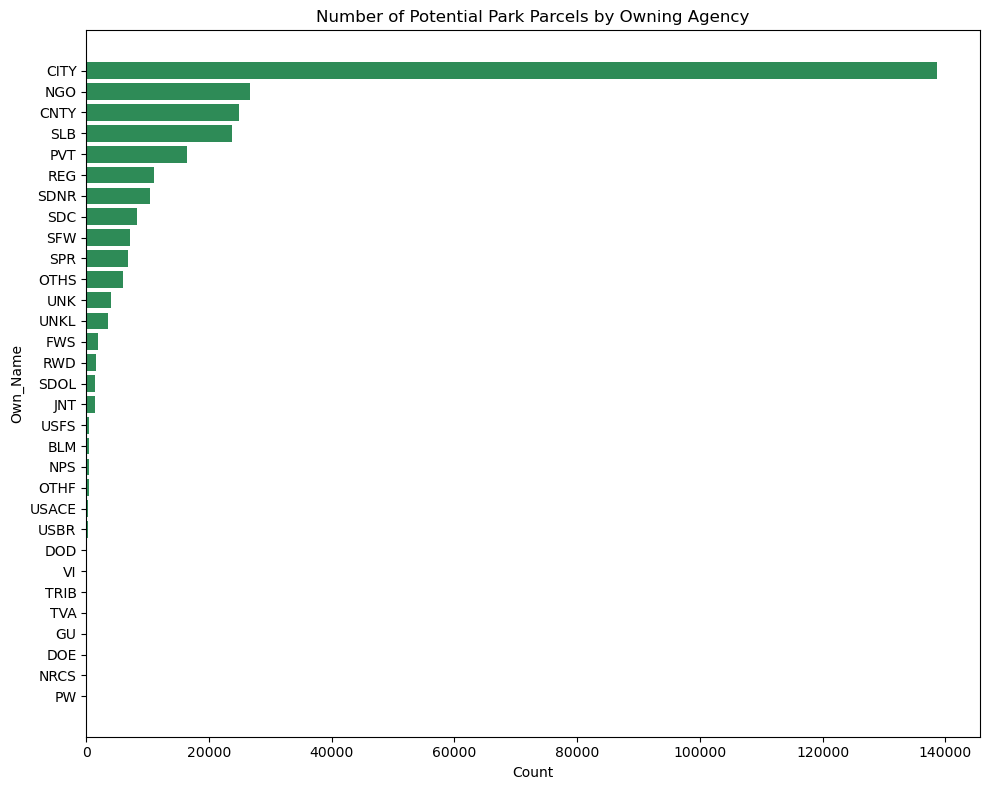

In [114]:
# Plot
plt.figure(figsize=(10, 8))
plt.barh(own_name_counts["Own_Name"], own_name_counts["count"], color="seagreen")
plt.xlabel("Count")
plt.ylabel("Own_Name")
plt.title("Number of Potential Park Parcels by Owning Agency")
plt.tight_layout()
plt.show()

In [45]:
padus_fee['Loc_Nm'].head(20)

0                     Central Plains Experimental Range
1                     Agricultural Research Service ARS
2                            Jornada Experimental Range
3      Roman L. Hruska U.S. Animal Meat Research Center
4                         Santa Rita Experimental Range
5                    Southern Plains Experimental Range
6     Southwestern Livestock and Forage Research Sta...
7                    Central Nevada Test Site Base Camp
8                              Department of Energy DOE
9                                                      
10                             Department of Energy DOE
11    Knolls Atomic Power Laboratory (US Dept of Ene...
12    Knolls Atomic Power Laboratory Kenneth A Kesse...
13                       Los Alamos National Laboratory
14                                     Nevada Test Site
15                                     Nevada Test Site
16                                  Savannah River Site
17                                  Savannah Riv

In [46]:
# Filter federally managed lands that are NOT already national parks
federal_lands = padus_fee[
    (padus_fee['Own_Type'] == 'FED') &
    (~padus_fee['Loc_Nm'].str.contains("National Park", case=False, na=False))
]

# Preview
federal_lands[['Loc_Nm', 'Mang_Name', 'Des_Tp', 'GAP_Sts']].head()

,Loc_Nm,Mang_Name,Des_Tp,GAP_Sts
71,Anchorage Field Office,BLM,PUB,3
72,Arctic District Office,BLM,PUB,3
73,U.S. Bureau of Land Management,BLM,PUB,3
74,Arctic District Office,BLM,PUB,3
75,Arctic District Office,BLM,PUB,3


In [47]:
federal_lands.shape

(4448, 32)

In [48]:
# Add centroid points for quick reference (lat/lon)
federal_lands['centroid'] = federal_lands.geometry.centroid
federal_lands['lat'] = federal_lands.centroid.y
federal_lands['lon'] = federal_lands.centroid.x

C:\Users\rbrio\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\rbrio\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\rbrio\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [49]:
# Keep a smaller table for quick viewing
federal_lands[['Loc_Nm', 'Mang_Name', 'Des_Tp', 'GAP_Sts', 'lat', 'lon']].head()

,Loc_Nm,Mang_Name,Des_Tp,GAP_Sts,lat,lon
71,Anchorage Field Office,BLM,PUB,3,5.600407e+06,-3.399524e+06
72,Arctic District Office,BLM,PUB,3,6.056287e+06,-3.323663e+06
73,U.S. Bureau of Land Management,BLM,PUB,3,5.525815e+06,-3.521428e+06
74,Arctic District Office,BLM,PUB,3,5.959043e+06,-3.144917e+06
75,Arctic District Office,BLM,PUB,3,5.623542e+06,-2.729761e+06


In [50]:
federal_lands = federal_lands.rename(columns={
    'Loc_Nm': 'Location_Name',
    'Mang_Name': 'Managing_Agency',
    'Des_Tp': 'Designation_Type',
    'GAP_Sts': 'GAP_Status',
    'lat': 'Latitude',
    'lon': 'Longitude'
})

In [51]:
# Preview the renamed columns
federal_lands[['Location_Name', 'Managing_Agency', 'Designation_Type', 'GAP_Status', 'Latitude', 'Longitude']].head()

,Location_Name,Managing_Agency,Designation_Type,GAP_Status,Latitude,Longitude
71,Anchorage Field Office,BLM,PUB,3,5.600407e+06,-3.399524e+06
72,Arctic District Office,BLM,PUB,3,6.056287e+06,-3.323663e+06
73,U.S. Bureau of Land Management,BLM,PUB,3,5.525815e+06,-3.521428e+06
74,Arctic District Office,BLM,PUB,3,5.959043e+06,-3.144917e+06
75,Arctic District Office,BLM,PUB,3,5.623542e+06,-2.729761e+06


In [52]:
federal_lands.to_csv("federal_lands_cleaned.csv", index=False)

In [53]:
federal_lands.head(50).to_csv("federal_lands_sample.csv", index=False)

### National Park Data EDA

In [54]:
nps_1_path = "Data/Annual Visitation By Park (1979 - Last Calendar Year).csv"
nps_visits_by_park = pd.read_csv(nps_1_path, skiprows=3)

C:\Users\rbrio\AppData\Local\Temp\ipykernel_46896\3990070716.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  nps_visits_by_park = pd.read_csv(nps_1_path, skiprows=3)


In [55]:
nps_visits_by_park.head(3)

,Rowelement1,Colhead2,Rowelement2,Rowelement3,ReportYear1,TotalNonRecreationVisits,TotalNonRecreationVisits1,ReportYear2,TotalRecreationVisitorHours,TotalRecreationVisitorHours1,...,RecreationVehicleOvernights1,ReportYear8,BackcountryOvernights,BackcountryOvernights1,ReportYear9,NonRecreationOvernights,NonRecreationOvernights1,ReportYear10,MiscellaneousOvernights,MiscellaneousOvernights1
0,Abraham Lincoln Birthplace NHP,2015.0,"148,605","240,402",NaN,NaN,0,NaN,NaN,"240,402",...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
1,Abraham Lincoln Birthplace NHP,2016.0,"252,495","240,402",NaN,NaN,0,NaN,NaN,"240,402",...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
2,Abraham Lincoln Birthplace NHP,2017.0,"269,580","240,402",NaN,NaN,0,NaN,NaN,"240,402",...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0


In [56]:
nps_2_path = "Data/Annual Visitation by Park Type or Region (1979 - Last Calendar Year).csv"
nps_visits_by_region = pd.read_csv(nps_2_path, skiprows=3)

In [57]:
nps_visits_by_region.head(3)

,Heading,ParkName,RecreationVisits,NonRecreationVisits,RecreationVisitorHours,NonRecreationVisitorHours,ConcessionerLodgingOvernights,ConcessionerCampingOvernights,TentOvernights,RecreationVehicleOvernights,...,ReportTotalNonRecreationVisits,ReportTotalRecreationVisitorHours,ReportTotalNonRecreationVisitorHours,ReportTotalConcessionerLodgingOvernights,ReportTotalConcessionerCampingOvernights,ReportTotalTentOvernights,ReportTotalRecreationVehicleOvernights,ReportTotalBackcountryOvernights,ReportTotalNonRecreationOvernights,ReportTotalMiscellaneousOvernights
0,NaN,Abraham Lincoln Birthplace NHP,"249,166",0,"249,166",0,0,0,0,0,...,"171,767,942","1,395,880,033","90,748,466","3,207,096","1,365,243","3,262,996","2,673,636","1,756,372","44,198","1,023,983"
1,NaN,Acadia NP,"3,961,661","47,100","26,948,748","47,100",0,"1,667","142,739","52,950",...,"171,767,942","1,395,880,033","90,748,466","3,207,096","1,365,243","3,262,996","2,673,636","1,756,372","44,198","1,023,983"
2,NaN,Adams NHP,"45,656",446,"44,806",224,0,0,0,0,...,"171,767,942","1,395,880,033","90,748,466","3,207,096","1,365,243","3,262,996","2,673,636","1,756,372","44,198","1,023,983"


In [58]:
nps_visits_by_region.columns.tolist()

['Heading',
 'ParkName',
 'RecreationVisits',
 'NonRecreationVisits',
 'RecreationVisitorHours',
 'NonRecreationVisitorHours',
 'ConcessionerLodgingOvernights',
 'ConcessionerCampingOvernights',
 'TentOvernights',
 'RecreationVehicleOvernights',
 'BackcountryOvernights',
 'NonRecreationOvernights',
 'MiscellaneousOvernights',
 'GroupTotal',
 'GroupTotalRecreationVisits',
 'GroupTotalNonRecreationVisits',
 'GroupTotalRecreationVisitorHours',
 'GroupTotalNonRecreationVisitorHours',
 'GroupTotalConcessionerLodgingOvernights',
 'GroupTotalConcessionerCampingOvernights',
 'GroupTotalTentOvernights',
 'GroupTotalRecreationVehicleOvernights',
 'GroupTotalBackcountryOvernights',
 'GroupTotalNonRecreationOvernights',
 'GroupTotalMiscellaneousOvernights',
 'ReportTotalRecreationVisits',
 'ReportTotalNonRecreationVisits',
 'ReportTotalRecreationVisitorHours',
 'ReportTotalNonRecreationVisitorHours',
 'ReportTotalConcessionerLodgingOvernights',
 'ReportTotalConcessionerCampingOvernights',
 'Report

In [59]:
# Rename the columns selected for the score card. 
nps_visits_by_park = nps_visits_by_park.rename(columns={
    'Rowelement1': 'Park_Name',
    'Colhead2': 'Year',
    'Rowelement2': 'Recreation_Visits'
})

In [60]:
# Same for region file 
nps_visits_by_region = nps_visits_by_region.rename(columns={
    'ParkName': 'Region_Name',
    'RecreationVisits': 'Recreation_Visits'
})

In [61]:
nps_visits_by_park[['Park_Name','Year','Recreation_Visits']].head()

,Park_Name,Year,Recreation_Visits
0,Abraham Lincoln Birthplace NHP,2015.0,"148,605"
1,Abraham Lincoln Birthplace NHP,2016.0,"252,495"
2,Abraham Lincoln Birthplace NHP,2017.0,"269,580"
3,Abraham Lincoln Birthplace NHP,2018.0,"260,964"
4,Abraham Lincoln Birthplace NHP,2019.0,"238,226"


In [62]:
# Just keeping the essential columns for now
region_df = nps_visits_by_region[['Region_Name', 'Recreation_Visits']]

In [63]:
region_df.head(3)

,Region_Name,Recreation_Visits
0,Abraham Lincoln Birthplace NHP,"249,166"
1,Acadia NP,"3,961,661"
2,Adams NHP,"45,656"


In [64]:
# Clean visits column first
nps_visits_by_park['Recreation_Visits'] = (
    nps_visits_by_park['Recreation_Visits']
    .replace({',': ''}, regex=True)
    .astype(float)
)

In [65]:
# Average annual visits by park
park_visits_benchmark = nps_visits_by_park.groupby('Park_Name')['Recreation_Visits'].mean().reset_index()

In [66]:
# National average & median
national_avg_visits = park_visits_benchmark['Recreation_Visits'].mean()
national_median_visits = park_visits_benchmark['Recreation_Visits'].median()

In [67]:
print(f"National average annual park visits: {national_avg_visits:,.0f}")
print(f"National median annual park visits: {national_median_visits:,.0f}")

National average annual park visits: 787,162
National median annual park visits: 174,292


In [118]:
# Sort by visits
plot_df = region_df.head(20).sort_values("Recreation_Visits", ascending=False)

In [121]:
# Ensure Recreation_Visits is integer
plot_df = region_df.copy()
plot_df["Recreation_Visits"] = (
    plot_df["Recreation_Visits"]
    .astype(str).str.replace(",", "", regex=False)
    .astype(int))

In [124]:
plot_df = plot_df.head(20).sort_values("Recreation_Visits", ascending=False)

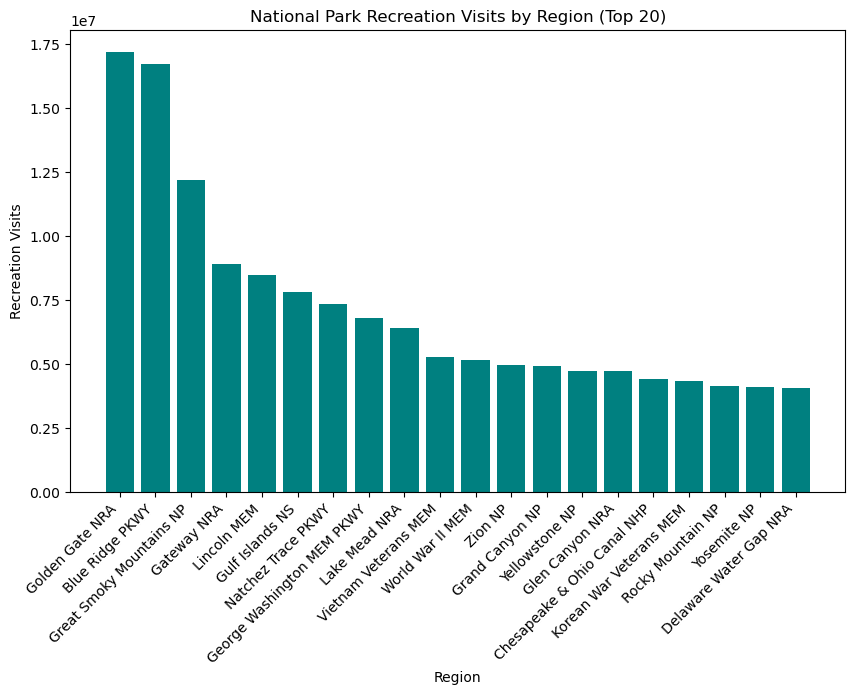

In [126]:
# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(plot_df["Region_Name"], plot_df["Recreation_Visits"], color="teal")
plt.ylabel("Recreation Visits")
plt.xlabel("Region")
plt.title("National Park Recreation Visits by Region (Top 20)")
plt.xticks(rotation=45, ha="right")
plt.show()

### Species Diversity Import and EDA

In [68]:
# Load the sheets, skipping the title rows
species_df = pd.read_excel("Data/nsExplorer-Export-2025-07-23-09-51.xlsx", sheet_name="Species", skiprows=1)

C:\Users\rbrio\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [69]:
ecosystems_df = pd.read_excel("Data/nsExplorer-Export-2025-07-23-09-51.xlsx", sheet_name="Ecosystems", skiprows=1)

C:\Users\rbrio\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [70]:
# Check what we have
species_df.head(3)

,Common Name,Scientific Name,Synonyms,Element Code,Species Group (Broad),Species Group (Fine),NatureServe Global Rank,NatureServe Rounded Global Rank,U.S. Endangered Species Act Status,COSEWIC Status,SARA Status,Distribution,View on NatureServe Explorer
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...
1,Eastern Cricket Frog,Acris crepitans,NaN,AAABC01030,Vertebrates,Amphibians,G4,G4,NaN,NaN,NaN,"United States (N5): AL (S5), DC (S3), DE (S5),...",https://explorer.natureserve.org/Taxon/ELEMENT...
2,Southern Cricket Frog,Acris gryllus,NaN,AAABC01020,Vertebrates,Amphibians,G5,G5,NaN,NaN,NaN,"United States (N5): AL (S5), FL (S4), GA (S5),...",https://explorer.natureserve.org/Taxon/ELEMENT...


In [71]:
ecosystems_df.head(3)

,View on NatureServe Explorer,Ecosystem Type,Upper Level Code,Classification Code,Common Name,Scientific Name,NatureServe Global Rank,NatureServe Rounded Global Rank,Distribution,Biome Code,Subbiome Code,Formation Code,Division Code,Macrogroup Code,GROUP Code,ALLIANCE Code,Next Level Up
0,https://explorer.natureserve.org/Taxon/ELEMENT...,Formation,TT1.a1,TT1.a1,Tropical Lowland Rainforest,Tropical Lowland Rainforest Ecobiome,NaN,NaN,United States\nMexico\nCaribbean: Bahamas; Cub...,TT1,TT1.a,TT1.a1,NaN,NaN,NaN,NaN,Tropical Rainforest Subbiome
1,https://explorer.natureserve.org/Taxon/ELEMENT...,Formation,TT1.a2,TT1.a2,Tropical Montane Rainforest,Tropical Montane Rainforest Ecobiome,NaN,NaN,United States\nMexico\nCaribbean: Cuba; Domini...,TT1,TT1.a,TT1.a2,NaN,NaN,NaN,NaN,Tropical Rainforest Subbiome
2,https://explorer.natureserve.org/Taxon/ELEMENT...,Formation,TT1.b1,TT1.b1,Tropical Seasonally Dry Forest & Thicket,Tropical Seasonally Dry Forest & Thicket Ecobiome,NaN,NaN,United States\nMexico\nCaribbean: Bahamas; Cub...,TT1,TT1.b,TT1.b1,NaN,NaN,NaN,NaN,Tropical Dry Forest Subbiome


In [72]:
species_df = species_df.rename(columns={
    'Common Name': 'Common_Name',
    'Scientific Name': 'Scientific_Name',
    'Species Group (Broad)': 'Group_Broad',
    'Species Group (Fine)': 'Group_Fine',
    'NatureServe Global Rank': 'Global_Rank',
    'Distribution': 'Distribution'
})

In [73]:
ecosystems_df = ecosystems_df.rename(columns={
    'Common Name': 'Ecosystem_Name',
    'NatureServe Global Rank': 'Ecosystem_Global_Rank',
    'Distribution': 'Ecosystem_Distribution'
})

In [74]:
import re

# Function to pull out 2-letter US state codes
def extract_states(distribution_text):
    if pd.isna(distribution_text):
        return []
    # Look for patterns like 'United States (N5): AR (S3), MO (S3), OK (S2)'
    return re.findall(r'\b[A-Z]{2}\b', distribution_text)

In [75]:
# Apply to species dataframe
species_df['States_List'] = species_df['Distribution'].apply(extract_states)

In [76]:
# Quick check
species_df[['Common_Name', 'States_List']].head(10)

,Common_Name,States_List
0,Blanchard's Cricket Frog,"[NX, ON, SX, AR, CO, SX, IA, IL, IN, KS, KY, L..."
1,Eastern Cricket Frog,"[AL, DC, DE, FL, GA, KY, LA, MD, MS, NC, NJ, N..."
2,Southern Cricket Frog,"[AL, FL, GA, LA, MS, NC, SC, TN, VA]"
3,Ringed Salamander,"[AR, MO, OK]"
4,Streamside Salamander,"[IN, KY, OH, TN, WV]"
5,Reticulated Flatwoods Salamander,"[AL, SX, FL, GA]"
6,California Tiger Salamander,[CA]
7,Frosted Flatwoods Salamander,"[FL, GA, SC]"
8,Northwestern Salamander,"[BC, AK, CA, OR, WA]"
9,Jefferson Salamander,"[ON, CT, IL, IN, KY, MA, MD, NH, NJ, NY, OH, P..."


In [77]:
species_exploded = species_df.explode('States_List')
species_exploded.head(10)

,Common_Name,Scientific_Name,Synonyms,Element Code,Group_Broad,Group_Fine,Global_Rank,NatureServe Rounded Global Rank,U.S. Endangered Species Act Status,COSEWIC Status,SARA Status,Distribution,View on NatureServe Explorer,States_List
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...,NX
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...,ON
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...,SX
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...,AR
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...,CO
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...,SX
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...,IA
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...,IL
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...,IN
0,Blanchard's Cricket Frog,Acris blanchardi,Acris crepitans blanchardi,AAABC01040,Vertebrates,Amphibians,G5,G5,NaN,Extirpated,Endangered/En voie de disparition,Canada (NX): ON (SX)\nUnited States (N5): AR (...,https://explorer.natureserve.org/Taxon/ELEMENT...,KS


In [78]:
species_count_by_state = species_exploded.groupby('States_List')['Common_Name'].nunique().reset_index()
species_count_by_state = species_count_by_state.rename(columns={'Common_Name': 'Species_Count'})

In [79]:
# Sort to see which states have the most species
species_count_by_state = species_count_by_state.sort_values('Species_Count', ascending=False)
species_count_by_state.head(10)

,States_List,Species_Count
48,ON,13095
58,SU,13069
52,QC,11717
5,BC,11668
30,MT,10257
6,CA,10220
17,IN,9807
0,AB,9553
68,WY,8787
50,PA,8713


In [144]:
# Provinces/territories to exclude
exclude_states = ["ON", "QC", "BC", "SU", "AB", "MB", "SK"]

In [145]:
species_count_by_state_us = species_count_by_state[
    ~species_count_by_state["States_List"].isin(exclude_states)
]

In [146]:
# Ensure Species_Count is numeric
plot_df = species_count_by_state_us.copy()
plot_df["Species_Count"] = pd.to_numeric(plot_df["Species_Count"], errors="coerce")

In [147]:
# Sort and select top 20
plot_df = plot_df.sort_values("Species_Count", ascending=False).head(20)

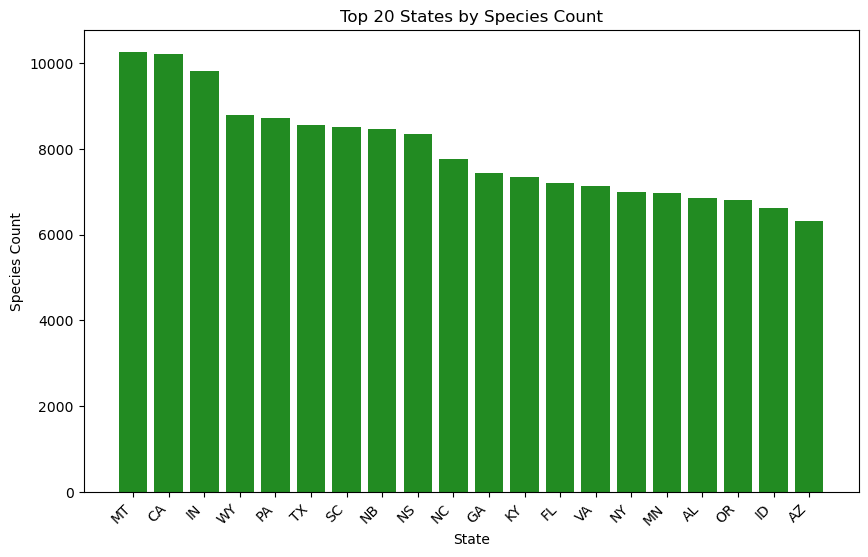

In [148]:
# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(plot_df["States_List"], plot_df["Species_Count"], color="forestgreen")
plt.ylabel("Species Count")
plt.xlabel("State")
plt.title("Top 20 States by Species Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [152]:
max_species = species_count_by_state_us['Species_Count'].max()
species_count_by_state_us['Biodiversity_Score'] = species_count_by_state_us['Species_Count'] / max_species

C:\Users\rbrio\AppData\Local\Temp\ipykernel_46896\2491836692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_count_by_state_us['Biodiversity_Score'] = species_count_by_state_us['Species_Count'] / max_species


## Building the Score Card

In [81]:
import re
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [82]:
region_df.to_csv("final_regions.csv", index=False)
species_count_by_state.to_csv("species_count_by_state.csv", index=False)
federal_lands.to_csv("federal_lands.csv", index=False)

### Scorecard for NPS Visitation Data

In [83]:
# Clean numeric visits and normalize to 0–10 tourism score
region_df = region_df.copy()
region_df["Recreation_Visits_num"] = (
    region_df["Recreation_Visits"]
      .astype(str)
      .str.replace(",", "", regex=False)
      .str.extract(r"(\d+\.?\d*)")[0]
      .astype(float)
      .fillna(0.0))

In [84]:
# Normalize visits → [0,10]
if region_df["Recreation_Visits_num"].max() > region_df["Recreation_Visits_num"].min():
    region_df["tourism_score_10"] = 10 * (
        (region_df["Recreation_Visits_num"] - region_df["Recreation_Visits_num"].min()) /
        (region_df["Recreation_Visits_num"].max() - region_df["Recreation_Visits_num"].min())
    )
else:
    region_df["tourism_score_10"] = 0.0

In [85]:
region_to_tourism = dict(zip(region_df["Region_Name"].str.strip(), region_df["tourism_score_10"]))
tourism_median = float(np.nanmedian(region_df["tourism_score_10"])) if len(region_df) else 0.0

### Scorecard for Species Data

In [153]:
species_count_by_state_us = species_count_by_state_us.copy()

In [154]:
species_count_by_state_us["biodiversity_score_10"] = (species_count_by_state_us["Biodiversity_Score"].astype(float).clip(0, 1)) * 10

In [155]:
state_to_biodiv = dict(zip(species_count_by_state_us["States_List"].str.strip(), species_count_by_state_us["biodiversity_score_10"]))
biodiv_median = float(np.nanmedian(species_count_by_state_us["biodiversity_score_10"])) if len(species_count_by_state_us) else 0.0

### Scorecard for Federal Lands

In [156]:
# Configuring the columns 
FED_STATE_COL   = "State_Nm"
FED_GAP_COL     = "GAP_Status"
FED_AGENCY_COL  = "Managing_Agency"
FED_DESIG_COL   = "Designation_Type"
FED_LOC_COLS    = ["Location_Name", "Unit_Nm"]

In [157]:
# Scoring weights
WEIGHTS = {"tourism": 0.40, "environment": 0.40, "feasibility": 0.20}

In [158]:
_state_abbrev = {
    # US states
    "AL":"AL","Alabama":"AL","AK":"AK","Alaska":"AK","AZ":"AZ","Arizona":"AZ","AR":"AR","Arkansas":"AR",
    "CA":"CA","California":"CA","CO":"CO","Colorado":"CO","CT":"CT","Connecticut":"CT",
    "DE":"DE","Delaware":"DE","FL":"FL","Florida":"FL","GA":"GA","Georgia":"GA","HI":"HI","Hawaii":"HI",
    "ID":"ID","Idaho":"ID","IL":"IL","Illinois":"IL","IN":"IN","Indiana":"IN","IA":"IA","Iowa":"IA",
    "KS":"KS","Kansas":"KS","KY":"KY","Kentucky":"KY","LA":"LA","Louisiana":"LA","ME":"ME","Maine":"ME",
    "MD":"MD","Maryland":"MD","MA":"MA","Massachusetts":"MA","MI":"MI","Michigan":"MI","MN":"MN","Minnesota":"MN",
    "MS":"MS","Mississippi":"MS","MO":"MO","Missouri":"MO","MT":"MT","Montana":"MT","NE":"NE","Nebraska":"NE",
    "NV":"NV","Nevada":"NV","NH":"NH","New Hampshire":"NH","NJ":"NJ","New Jersey":"NJ","NM":"NM","New Mexico":"NM",
    "NY":"NY","New York":"NY","NC":"NC","North Carolina":"NC","ND":"ND","North Dakota":"ND","OH":"OH","Ohio":"OH",
    "OK":"OK","Oklahoma":"OK","OR":"OR","Oregon":"OR","PA":"PA","Pennsylvania":"PA","RI":"RI","Rhode Island":"RI",
    "SC":"SC","South Carolina":"SC","SD":"SD","South Dakota":"SD","TN":"TN","Tennessee":"TN","TX":"TX","Texas":"TX",
    "UT":"UT","Utah":"UT","VT":"VT","Vermont":"VT","VA":"VA","Virginia":"VA","WA":"WA","Washington":"WA",
    "WV":"WV","West Virginia":"WV","WI":"WI","Wisconsin":"WI","WY":"WY","Wyoming":"WY",
    # Common Canada codes present in your species CSV (keep if needed)
    "ON":"ON","QC":"QC","BC":"BC","SU":"SU"
}

In [159]:
# function to parse the state 
def parse_states(val):
    """Return list of state abbreviations from a cell like 'Alaska' or 'AK, WA'."""
    if pd.isna(val): 
        return []
    s = str(val).strip()
    parts = [p.strip() for p in re.split(r"[,\;/\|]+", s) if p.strip()] or [s]
    out = []
    for p in parts:
        out.append(_state_abbrev.get(p, _state_abbrev.get(p.title(), p)))
    return out

In [160]:
# function for generating the score of tourism
def tourism_score_for_row(row):
    # Try explicit mapping first
    for col in FED_LOC_COLS:
        if col in row and pd.notna(row[col]):
            key = str(row[col]).strip()
            UNIT_TO_REGION = {}
            if key in UNIT_TO_REGION:
                mapped_region = UNIT_TO_REGION[key]
                if mapped_region in region_to_tourism:
                    return float(region_to_tourism[mapped_region])
            # Try exact region match with the same name
            if key in region_to_tourism:
                return float(region_to_tourism[key])
    # Fallback: national median tourism score
    return tourism_median

In [161]:
def biodiversity_score_for_row(row):
    if FED_STATE_COL in row and pd.notna(row[FED_STATE_COL]):
        states = parse_states(row[FED_STATE_COL])
        scores = [state_to_biodiv.get(st) for st in states if st in state_to_biodiv]
        if scores:
            return float(np.max(scores))  # reward any high-biodiversity overlap
    return biodiv_median

In [162]:
def feasibility_score_for_row(row):
    # Prefer GAP if present
    GAP_MAP = {1: 2.0, 2: 5.0, 3: 8.0, 4: 10.0}
    if FED_GAP_COL in row and pd.notna(row[FED_GAP_COL]):
        try:
            return GAP_MAP.get(int(row[FED_GAP_COL]), 6.0)
        except Exception:
            pass
    # Heuristic fallback using agency/designation
    base = 7.0
    if FED_AGENCY_COL in row and pd.notna(row[FED_AGENCY_COL]):
        ag = str(row[FED_AGENCY_COL]).upper()
        if any(k in ag for k in ["NPS", "BLM", "FWS", "FOREST", "USFS"]):
            base = 7.5
    if FED_DESIG_COL in row and pd.notna(row[FED_DESIG_COL]):
        d = str(row[FED_DESIG_COL]).upper()
        if any(k in d for k in ["NATIONAL MONUMENT", "WILDERNESS", "WILDLIFE REFUGE"]):
            base -= 1.0  # already strong protection; slightly lower upgrade feasibility
    return float(np.clip(base, 0, 10))

In [163]:
def build_scorecard_no_merge(fed_df: pd.DataFrame, weights=WEIGHTS) -> pd.DataFrame:
    df = fed_df.copy()

    df["tourism_score"]     = df.apply(tourism_score_for_row, axis=1)
    df["environment_score"] = df.apply(biodiversity_score_for_row, axis=1)
    df["feasibility_score"] = df.apply(feasibility_score_for_row, axis=1)

    df["total_score"] = (
        df["tourism_score"]     * weights.get("tourism", 0.4) +
        df["environment_score"] * weights.get("environment", 0.4) +
        df["feasibility_score"] * weights.get("feasibility", 0.2)
    )

    # Put identifiers + scores up front
    id_cols = [c for c in ["Location_Name","Unit_Nm","Managing_Agency","Designation_Type","State_Nm","GAP_Status"] if c in df.columns]
    ordered = id_cols + ["tourism_score","environment_score","feasibility_score","total_score"]
    ordered = list(dict.fromkeys(ordered))  # dedupe preserve order
    rest = [c for c in df.columns if c not in ordered]
    out = df[ordered + rest].sort_values("total_score", ascending=False)
    return out

In [164]:
scorecard = build_scorecard_no_merge(federal_lands)
scorecard.to_csv("national_park_scorecard_no_merge.csv", index=False)
scorecard.head(10)

,Location_Name,Unit_Nm,Managing_Agency,Designation_Type,State_Nm,GAP_Status,tourism_score,environment_score,feasibility_score,total_score,...,IUCNCtSrc,IUCNCtDt,Date_Est,Comments,SHAPE_Length,SHAPE_Area,geometry,centroid,Latitude,Longitude
1998,ENNIS NATIONAL FISH HATCHERY,Ennis National Fish Hatchery,FWS,FOTH,MT,4,0.09935,10.0,10.0,6.03974,...,GAP - Default,2024,,,4055.985011,6.565974e+05,"MULTIPOLYGON (((-1233364.059 2572663.156, -123...",POINT (-1233845.623 2572842.466),2.572842e+06,-1.233846e+06
2938,Ennis National Fish Hatchery,Ennis National Fish Hatchery,FWS,FOTH,MT,4,0.09935,10.0,10.0,6.03974,...,GAP - Default,2024,,,4056.000878,6.566046e+05,"MULTIPOLYGON (((-1233364.767 2572663.267, -123...",POINT (-1233846.242 2572843.157),2.572843e+06,-1.233846e+06
1416,NEPE,Nez Perce National Historical Park,NPS,HCA,MT,4,0.09935,10.0,10.0,6.03974,...,GAP - Default,2024,1965,Unofficial Boundary of Nez Perce National Hist...,3967.652343,7.910208e+05,"MULTIPOLYGON (((-984577.123 2888952, -984633.4...",POINT (-985031.516 2888349.816),2.888350e+06,-9.850315e+05
2876,Creston National Fish Hatchery,Creston National Fish Hatchery,FWS,FOTH,MT,4,0.09935,10.0,10.0,6.03974,...,GAP - Default,2024,,,4311.529047,3.850133e+05,"MULTIPOLYGON (((-1350625.327 2929126.89, -1350...",POINT (-1350195.776 2929059.822),2.929060e+06,-1.350196e+06
1279,BIHO,Big Hole National Battlefield,NPS,HCA,MT,4,0.09935,10.0,10.0,6.03974,...,GAP - Default,2024,,Big Hole National Battlefield,7229.980150,2.659207e+06,"MULTIPOLYGON (((-1367760.602 2646035.775, -136...",POINT (-1368571.378 2645101.974),2.645102e+06,-1.368571e+06
82010,Unknown Park,Unknown Park,OTHF,LP,MT,4,0.09935,10.0,10.0,6.03974,...,GAP - Default,2024,,,1311.848873,4.563854e+04,"MULTIPOLYGON (((-1262781.307 2953688.431, -126...",POINT (-1262546.389 2953273.489),2.953273e+06,-1.262546e+06
1938,CRESTON NATIONAL FISH HATCHERY,Creston National Fish Hatchery,FWS,FOTH,MT,4,0.09935,10.0,10.0,6.03974,...,GAP - Default,2024,,,4311.529121,3.850138e+05,"MULTIPOLYGON (((-1350624.772 2929125.745, -135...",POINT (-1350195.22 2929058.676),2.929059e+06,-1.350195e+06
2779,Bozeman Fish Technology Center,Bozeman Fish Technology Center,FWS,FOTH,MT,4,0.09935,10.0,10.0,6.03974,...,GAP - Default,2024,,,4531.135218,7.052952e+05,"MULTIPOLYGON (((-1161544.666 2616199.476, -116...",POINT (-1161974.045 2616249.305),2.616249e+06,-1.161974e+06
81946,Fort Peck City Park,Fort Peck City Park,OTHF,LP,MT,4,0.09935,10.0,10.0,6.03974,...,GAP - Default,2024,,,867.851708,2.342498e+04,"MULTIPOLYGON (((-689342.489 2824000.946, -6893...",POINT (-689401.506 2823863.562),2.823864e+06,-6.894015e+05
81949,Unknown Park,Unknown Park,OTHF,LP,MT,4,0.09935,10.0,10.0,6.03974,...,GAP - Default,2024,,,639.255412,9.384119e+03,"MULTIPOLYGON (((-689532.211 2823792.784, -6895...",POINT (-689559.817 2823818.169),2.823818e+06,-6.895598e+05


In [165]:
scorecard = scorecard.sort_values(
    by=["total_score", "GIS_Acres"], 
    ascending=[False, False]
).reset_index(drop=True)

scorecard["score_rank"] = scorecard.index + 1

In [166]:
scorecard.head(25)

,Location_Name,Unit_Nm,Managing_Agency,Designation_Type,State_Nm,GAP_Status,tourism_score,environment_score,feasibility_score,total_score,...,IUCNCtDt,Date_Est,Comments,SHAPE_Length,SHAPE_Area,geometry,centroid,Latitude,Longitude,score_rank
0,GRKO,Grant-Kohrs Ranch National Historic Site,NPS,HCA,MT,4,0.09935,10.000000,10.0,6.039740,...,2024,1972,Grant-Kohrs Ranch National Historic Site,17837.192878,5.178762e+06,"MULTIPOLYGON (((-1283470.565 2715797.374, -128...",POINT (-1284523.927 2715898.028),2.715898e+06,-1.284524e+06,1
1,BIHO,Big Hole National Battlefield,NPS,HCA,MT,4,0.09935,10.000000,10.0,6.039740,...,2024,,Big Hole National Battlefield,7229.980150,2.659207e+06,"MULTIPOLYGON (((-1367760.602 2646035.775, -136...",POINT (-1368571.378 2645101.974),2.645102e+06,-1.368571e+06,2
2,NEPE,Nez Perce National Historical Park,NPS,HCA,MT,4,0.09935,10.000000,10.0,6.039740,...,2024,1965,Unofficial Boundary of Nez Perce National Hist...,3967.652343,7.910208e+05,"MULTIPOLYGON (((-984577.123 2888952, -984633.4...",POINT (-985031.516 2888349.816),2.888350e+06,-9.850315e+05,3
3,Bozeman Fish Technology Center,Bozeman Fish Technology Center,FWS,FOTH,MT,4,0.09935,10.000000,10.0,6.039740,...,2024,,,4531.135218,7.052952e+05,"MULTIPOLYGON (((-1161544.666 2616199.476, -116...",POINT (-1161974.045 2616249.305),2.616249e+06,-1.161974e+06,4
4,BOZEMAN FISH TECHNOLOGY CENTER,Bozeman Fish Technology Center,FWS,FOTH,MT,4,0.09935,10.000000,10.0,6.039740,...,2024,,,4531.120801,7.052906e+05,"MULTIPOLYGON (((-1161543.925 2616198.662, -116...",POINT (-1161973.304 2616248.489),2.616248e+06,-1.161973e+06,5
5,ENNIS NATIONAL FISH HATCHERY,Ennis National Fish Hatchery,FWS,FOTH,MT,4,0.09935,10.000000,10.0,6.039740,...,2024,,,4055.985011,6.565974e+05,"MULTIPOLYGON (((-1233364.059 2572663.156, -123...",POINT (-1233845.623 2572842.466),2.572842e+06,-1.233846e+06,6
6,Ennis National Fish Hatchery,Ennis National Fish Hatchery,FWS,FOTH,MT,4,0.09935,10.000000,10.0,6.039740,...,2024,,,4056.000878,6.566046e+05,"MULTIPOLYGON (((-1233364.767 2572663.267, -123...",POINT (-1233846.242 2572843.157),2.572843e+06,-1.233846e+06,7
7,Creston National Fish Hatchery,Creston National Fish Hatchery,FWS,FOTH,MT,4,0.09935,10.000000,10.0,6.039740,...,2024,,,4311.529047,3.850133e+05,"MULTIPOLYGON (((-1350625.327 2929126.89, -1350...",POINT (-1350195.776 2929059.822),2.929060e+06,-1.350196e+06,8
8,CRESTON NATIONAL FISH HATCHERY,Creston National Fish Hatchery,FWS,FOTH,MT,4,0.09935,10.000000,10.0,6.039740,...,2024,,,4311.529121,3.850138e+05,"MULTIPOLYGON (((-1350624.772 2929125.745, -135...",POINT (-1350195.22 2929058.676),2.929059e+06,-1.350195e+06,9
9,Unknown Park,Unknown Park,OTHF,LP,MT,4,0.09935,10.000000,10.0,6.039740,...,2024,,,1311.848873,4.563854e+04,"MULTIPOLYGON (((-1262781.307 2953688.431, -126...",POINT (-1262546.389 2953273.489),2.953273e+06,-1.262546e+06,10


In [167]:
scorecard["State_Nm"].unique()

array(['MT', 'CA', 'IN', 'WY', 'PA', 'TX', 'SC', 'NC', 'GA', 'KY', 'FL',
       'VA', 'NY', 'MN', 'AL', 'OR', 'ID', 'MD', 'AZ', 'TN', 'VT', 'CO',
       'NM', 'MI', 'WA', 'IL', 'WI', 'AR', 'UT', 'NJ', 'GU', 'VI', 'PR',
       'MA', 'MS', 'RI', 'MO', 'OH', 'LA', 'NV', 'WV', 'OK', 'CT', 'ME',
       'NH', 'KS', 'DC', 'DE', 'IA', 'AK', 'NE', 'SD', 'UNKF', 'UM', 'AS',
       'ND', 'HI'], dtype=object)

In [168]:
state_scores = (
    scorecard.groupby("State_Nm", as_index=False)["total_score"]
      .sum()
      .sort_values("total_score", ascending=False)
)

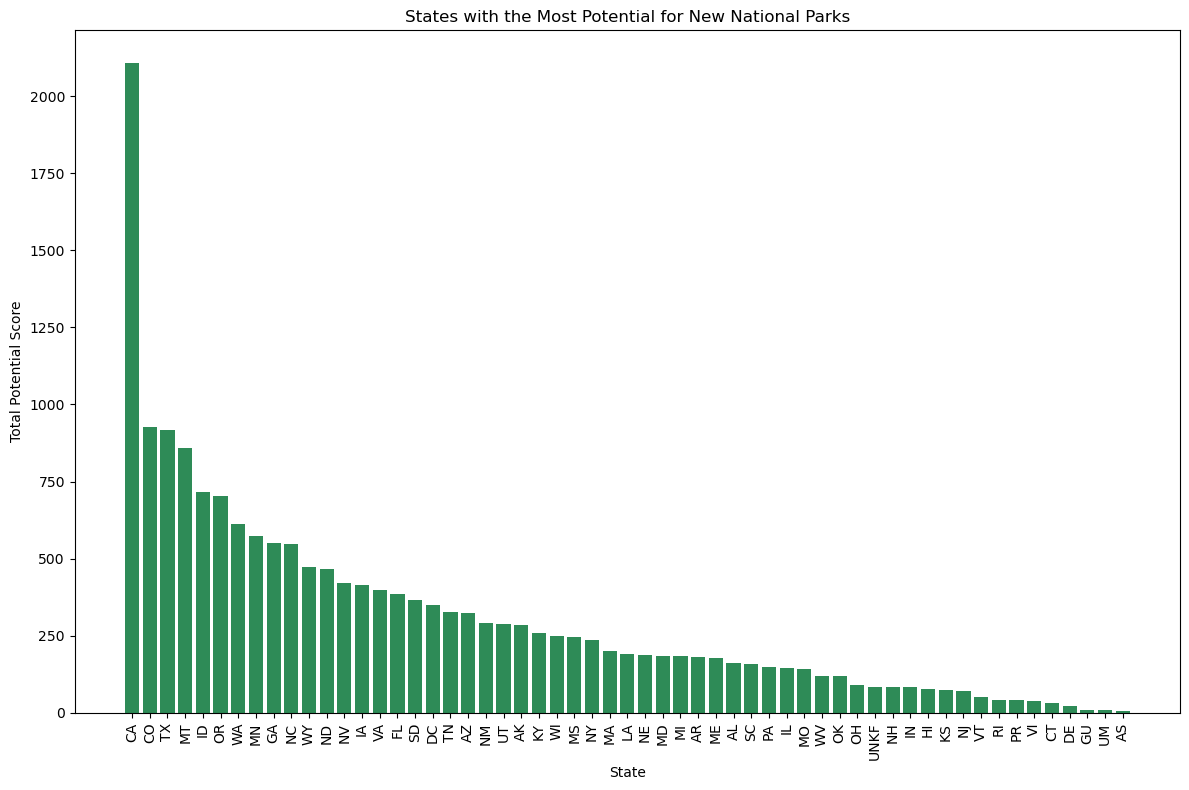

In [169]:
# Plot
plt.figure(figsize=(12,8))
bars = plt.bar(state_scores["State_Nm"], state_scores["total_score"], color="seagreen")
plt.xticks(rotation=90)
plt.ylabel("Total Potential Score")
plt.xlabel("State")
plt.title("States with the Most Potential for New National Parks")

plt.tight_layout()
plt.show()

In [177]:
# Sort by total_score (and maybe Acres if tiebreak is needed)
top10 = scorecard.sort_values(
    by=["total_score"], ascending=False
).head(10).copy()

In [178]:
# Keep only relevant columns
top10_clean = top10[
    ["Unit_Nm", "State_Nm", "tourism_score", "environment_score", "feasibility_score", "total_score", "score_rank"]
].rename(columns={
    "Unit_Nm": "Park_Name",
    "State_Nm": "State",
    "tourism_score": "Tourism_Score",
    "environment_score": "Environment_Score",
    "feasibility_score": "Feasibility_Score",
    "total_score": "Total_Score",
    "score_rank": "Rank"
})

In [179]:
# Round numeric scores for readability
score_cols = ["Tourism_Score", "Environment_Score", "Feasibility_Score", "Total_Score"]
top10_clean[score_cols] = top10_clean[score_cols].round(3)

In [180]:
# Display nicely
top10_clean.reset_index(drop=True, inplace=True)
print(top10_clean)

                                  Park_Name State  Tourism_Score  \
0  Grant-Kohrs Ranch National Historic Site    MT          0.099   
1            Creston National Fish Hatchery    MT          0.099   
2             Big Hole National Battlefield    MT          0.099   
3                              Unknown Park    MT          0.099   
4                              Unknown Park    MT          0.099   
5            Creston National Fish Hatchery    MT          0.099   
6                       Fort Peck City Park    MT          0.099   
7              Ennis National Fish Hatchery    MT          0.099   
8              Ennis National Fish Hatchery    MT          0.099   
9            Bozeman Fish Technology Center    MT          0.099   

   Environment_Score  Feasibility_Score  Total_Score  Rank  
0               10.0               10.0         6.04     1  
1               10.0               10.0         6.04     8  
2               10.0               10.0         6.04     2  
3      

In [194]:
# List of parks to exclude
exclude_parks = [
    "Unknown Park",
    "Ennis National Fish Hatchery",
    "Fullerton Sports Complex",
    "Fort Peck City Park"
]

In [195]:
# Filter out unwanted parks (case-insensitive match)
scorecard_filtered = scorecard[
    ~scorecard["Unit_Nm"].str.lower().isin([p.lower() for p in exclude_parks])
].copy()


In [196]:
# Drop duplicates by park name (case-insensitive)
scorecard_filtered = scorecard_filtered.drop_duplicates(
    subset=["Unit_Nm"], keep="first"
)

In [197]:
# Generate Top 10
top10 = scorecard_filtered.sort_values(
    by=["total_score"], ascending=False
).head(10).copy()

In [198]:
top10_clean = top10[
    ["Unit_Nm", "State_Nm", "tourism_score", "environment_score", "feasibility_score", "total_score", "score_rank"]
].rename(columns={
    "Unit_Nm": "Park_Name",
    "State_Nm": "State",
    "tourism_score": "Tourism_Score",
    "environment_score": "Environment_Score",
    "feasibility_score": "Feasibility_Score",
    "total_score": "Total_Score",
    "score_rank": "Rank"
})

In [199]:
# Round numeric scores
score_cols = ["Tourism_Score", "Environment_Score", "Feasibility_Score", "Total_Score"]
top10_clean[score_cols] = top10_clean[score_cols].round(3)

In [200]:
top10_clean

,Park_Name,State,Tourism_Score,Environment_Score,Feasibility_Score,Total_Score,Rank
0,Grant-Kohrs Ranch National Historic Site,MT,0.099,10.000,10.0,6.040,1
2,Nez Perce National Historical Park,MT,0.099,10.000,10.0,6.040,3
3,Bozeman Fish Technology Center,MT,0.099,10.000,10.0,6.040,4
7,Creston National Fish Hatchery,MT,0.099,10.000,10.0,6.040,8
1,Big Hole National Battlefield,MT,0.099,10.000,10.0,6.040,2
63,San Francisco Maritime National Historical Park,CA,0.099,9.964,10.0,6.025,64
69,East Bay Gateway Shoreline,CA,0.099,9.964,10.0,6.025,70
67,Fort Point National Historic Site,CA,0.099,9.964,10.0,6.025,68
66,Presidio,CA,0.099,9.964,10.0,6.025,67
65,Camp Kohler,CA,0.099,9.964,10.0,6.025,66
